## Stock Trading Strategy Project

The purpose of this project is to create a stock portfolio and select short and long moving averages that will determine good points to buy or sell a stock, or to invest. Ideally, this strategy is one that a financial operator would use to advertise on buying, selling, or investing using the Simple Moving Average (SMA) method.

Sources used to help build the code to this project include the following:


https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp

https://www.tradingsim.com/day-trading/20-period-moving-average

This is an optional step

The following code will download the pandas datareader which will be crucial to downloading data from Yahoo Finance:

'!pip install --upgrade pandas-datareader'

First, I download the necessary libraries to begin with the project.

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr 
import matplotlib.pyplot as plt
import datetime as dt

## AMAZON (AMZN)

Next, I will start with pulling Amazon stock data from 01/01/2020 to 12/31/2020.
I define start and end time variables, then use these variables to define the time frame in which
I want to pull from Yahoo Finance.

In [2]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

amzn = pdr.get_data_yahoo('AMZN', start = start, end = end)
amzn

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,94.900497,93.207497,93.750000,94.900497,80580000,94.900497
2020-01-03,94.309998,93.224998,93.224998,93.748497,75288000,93.748497
2020-01-06,95.184502,93.000000,93.000000,95.143997,81236000,95.143997
2020-01-07,95.694504,94.601997,95.224998,95.343002,80898000,95.343002
2020-01-08,95.550003,94.321999,94.902000,94.598503,70160000,94.598503
...,...,...,...,...,...,...
2020-12-24,160.100006,158.449997,159.695007,158.634506,29038000,158.634506
2020-12-28,165.199997,158.634506,159.699997,164.197998,113736000,164.197998
2020-12-29,167.532501,164.061005,165.496994,166.100006,97458000,166.100006


The Amazon data is now pulled. I will visualize the closing price from 01/01/2020 to 12/31/2020 to optimize
a choice of simple short and long moving averages (SMA).

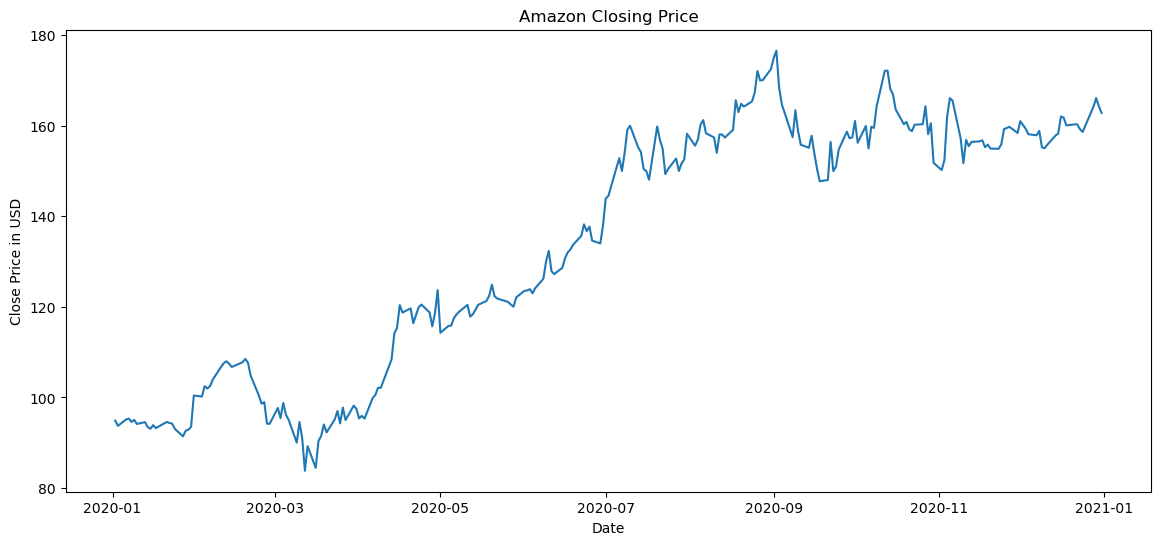

In [3]:
plt.figure(figsize=(14,6))
plt.title('Amazon Closing Price')
plt.plot(amzn['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.show()

Now that I can visualize the stock data with a line chart, I can figure out a good SMA to use. For stocks in the shopping industry, I will utilize 10-day and 20-day moving averages. This is a good strategy to use to see a more persistent trend across each stock.

To do so, I will create a new column for each SMA. The .rolling() function allows for rolling window calculations, and the min_periods function specifies the number of windows needed to have a value.

After this is calculated, I will create another column that highlights when the short SMA crosses the long SMA, called 'Signal'. When the short SMA crosses the long, it will signal a 'buy' and will equal 1. When the long SMA crosses the short, it will signal a 'sell' and will equal 0. This is referred to as a crossover.

In [4]:
# 20-day simple moving average column 
amzn['10_SMA'] = amzn['Close'].rolling(window = 10, min_periods = 1).mean()

# 200-day simple moving average column
amzn['20_SMA'] = amzn['Close'].rolling(window = 20, min_periods = 1).mean()
amzn.head(5)

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA
Date,,,,,,,,
2020-01-02,94.900497,93.207497,93.750000,94.900497,80580000,94.900497,94.900497,94.900497
2020-01-03,94.309998,93.224998,93.224998,93.748497,75288000,93.748497,94.324497,94.324497
2020-01-06,95.184502,93.000000,93.000000,95.143997,81236000,95.143997,94.597664,94.597664
2020-01-07,95.694504,94.601997,95.224998,95.343002,80898000,95.343002,94.783998,94.783998
2020-01-08,95.550003,94.321999,94.902000,94.598503,70160000,94.598503,94.746899,94.746899


In [5]:
amzn['10_SMA'] = amzn['Close'].rolling(window = 10, min_periods = 1).mean()
amzn['20_SMA'] = amzn['Close'].rolling(window = 20, min_periods = 1).mean()
amzn['Signal'] = 0.0
amzn['Signal'] = np.where(amzn['10_SMA'] > amzn['20_SMA'], 1.0, 0.0)

amzn.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal
Date,,,,,,,,,
2020-01-02,94.900497,93.207497,93.750000,94.900497,80580000,94.900497,94.900497,94.900497,0.0
2020-01-03,94.309998,93.224998,93.224998,93.748497,75288000,93.748497,94.324497,94.324497,0.0
2020-01-06,95.184502,93.000000,93.000000,95.143997,81236000,95.143997,94.597664,94.597664,0.0
2020-01-07,95.694504,94.601997,95.224998,95.343002,80898000,95.343002,94.783998,94.783998,0.0
2020-01-08,95.550003,94.321999,94.902000,94.598503,70160000,94.598503,94.746899,94.746899,0.0


Based off the signal values, its position can be determined by taking the difference of each signal, thus representing a trading signal.

Crossover happens when the short and long moving averages cross; the point where the signal changes from 0 to 1, or from 1 to 0.

I will create another column called 'Position' to show the crossover points.

In [6]:
amzn['Position'] = amzn['Signal'].diff()
amzn.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,94.900497,93.207497,93.750000,94.900497,80580000,94.900497,94.900497,94.900497,0.0,NaN
2020-01-03,94.309998,93.224998,93.224998,93.748497,75288000,93.748497,94.324497,94.324497,0.0,0.0
2020-01-06,95.184502,93.000000,93.000000,95.143997,81236000,95.143997,94.597664,94.597664,0.0,0.0
2020-01-07,95.694504,94.601997,95.224998,95.343002,80898000,95.343002,94.783998,94.783998,0.0,0.0
2020-01-08,95.550003,94.321999,94.902000,94.598503,70160000,94.598503,94.746899,94.746899,0.0,0.0


Lastly, I will visualize this information onto a line graph that shows the buy and sell points.

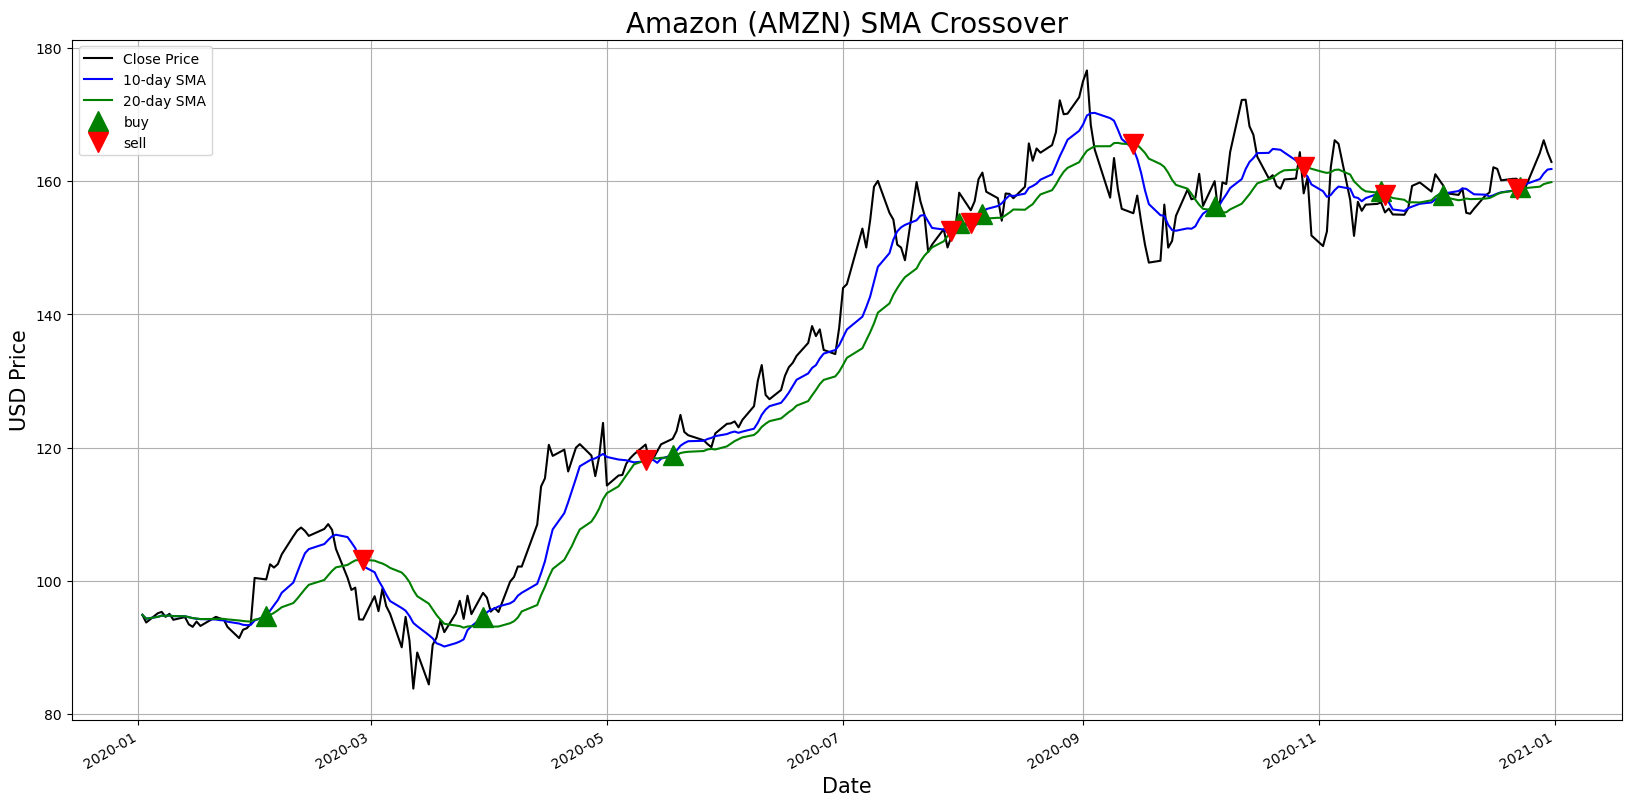

In [7]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
amzn['Close'].plot(color = 'k', label= 'Close Price') 
amzn['10_SMA'].plot(color = 'b',label = '10-day SMA') 
amzn['20_SMA'].plot(color = 'g', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(amzn[amzn['Position'] == 1].index, 
         amzn['10_SMA'][amzn['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(amzn[amzn['Position'] == -1].index, 
         amzn['20_SMA'][amzn['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Amazon (AMZN) SMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

The following 4 stocks will use the same strategy as outlined above: Apple (AAPL), Nike (NKE), Target (TGT) and Microsoft (MSFT).

## APPLE (AAPL)

In [8]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

aapl = pdr.get_data_yahoo('AAPL', start = start, end = end)
aapl.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.561539
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.846375
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.426811
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.081497
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.257111


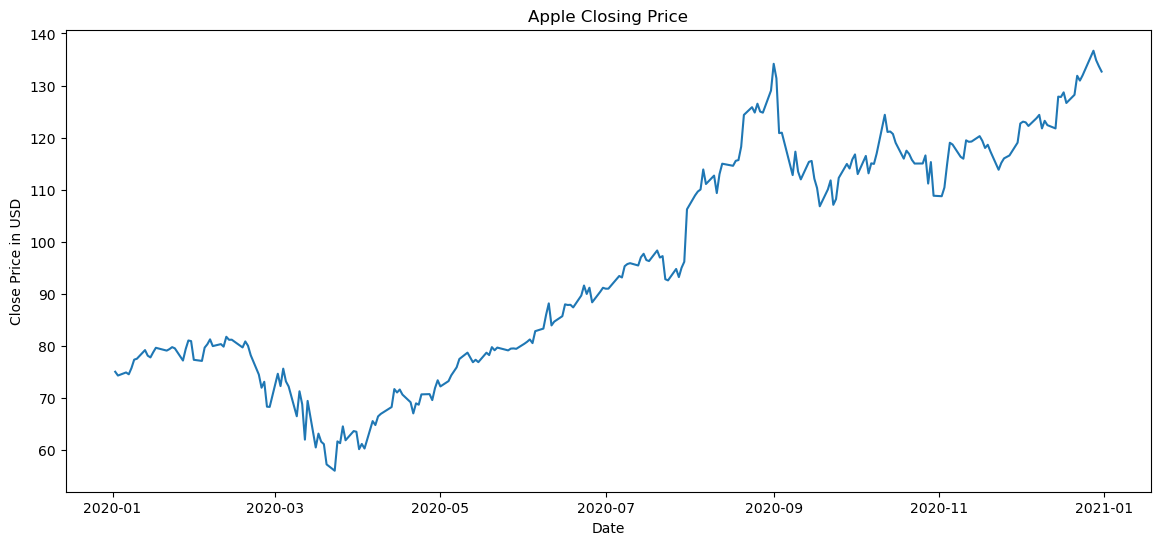

In [9]:
plt.figure(figsize=(14,6))
plt.title('Apple Closing Price')
plt.plot(aapl['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.show()

In [10]:
aapl['10_SMA'] = aapl['Close'].rolling(window = 10, min_periods = 1).mean()
aapl['20_SMA'] = aapl['Close'].rolling(window = 20, min_periods = 1).mean()
aapl['Signal'] = 0.0
aapl['Signal'] = np.where(aapl['10_SMA'] > aapl['20_SMA'], 1.0, 0.0)
aapl['Position'] = aapl['Signal'].diff()
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.561539,75.087502,75.087502,0.0,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.846375,74.722500,74.722500,0.0,0.0
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.426811,74.798332,74.798332,0.0,0.0
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.081497,74.748125,74.748125,0.0,0.0
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.257111,74.958000,74.958000,0.0,0.0


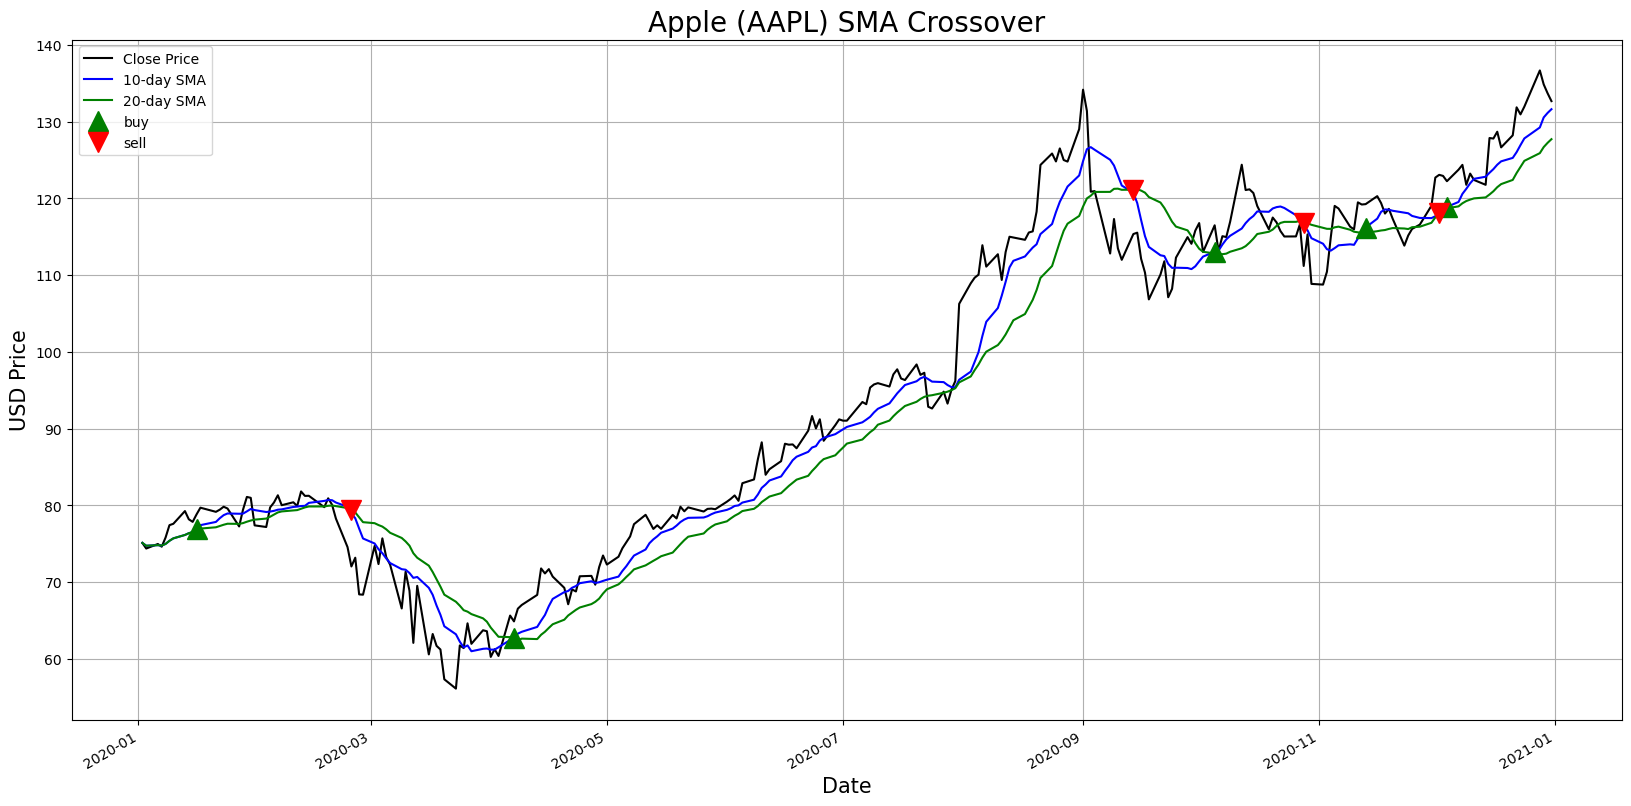

In [11]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
aapl['Close'].plot(color = 'k', label= 'Close Price') 
aapl['10_SMA'].plot(color = 'b',label = '10-day SMA') 
aapl['20_SMA'].plot(color = 'g', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(aapl[aapl['Position'] == 1].index, 
         aapl['10_SMA'][aapl['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(aapl[aapl['Position'] == -1].index, 
         aapl['20_SMA'][aapl['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Apple (AAPL) SMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## NIKE (NKE)

In [12]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

nke = pdr.get_data_yahoo('NKE', start = start, end = end)
nke

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,102.209999,101.019997,101.360001,102.199997,5644100.0,99.411591
2020-01-03,102.000000,100.309998,100.589996,101.919998,4541800.0,99.139244
2020-01-06,101.839996,100.870003,100.949997,101.830002,4612400.0,99.051712
2020-01-07,102.739998,100.809998,101.809998,101.779999,6719900.0,99.003067
2020-01-08,102.139999,100.849998,101.309998,101.550003,4942200.0,98.779335
...,...,...,...,...,...,...
2020-12-24,142.190002,141.100006,141.100006,141.600006,1821900.0,139.049255
2020-12-28,142.919998,141.039993,142.539993,142.429993,4081500.0,139.864288
2020-12-29,143.059998,140.429993,142.830002,141.570007,3232400.0,139.019791


In [13]:
nke['10_SMA'] = nke['Close'].rolling(window = 10, min_periods = 1).mean()
nke['20_SMA'] = nke['Close'].rolling(window = 20, min_periods = 1).mean()
nke['Signal'] = 0.0
nke['Signal'] = np.where(nke['10_SMA'] > nke['20_SMA'], 1.0, 0.0)
nke['Position'] = nke['Signal'].diff()
nke.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,102.209999,101.019997,101.360001,102.199997,5644100.0,99.411591,102.199997,102.199997,0.0,NaN
2020-01-03,102.000000,100.309998,100.589996,101.919998,4541800.0,99.139244,102.059998,102.059998,0.0,0.0
2020-01-06,101.839996,100.870003,100.949997,101.830002,4612400.0,99.051712,101.983332,101.983332,0.0,0.0
2020-01-07,102.739998,100.809998,101.809998,101.779999,6719900.0,99.003067,101.932499,101.932499,0.0,0.0
2020-01-08,102.139999,100.849998,101.309998,101.550003,4942200.0,98.779335,101.856000,101.856000,0.0,0.0


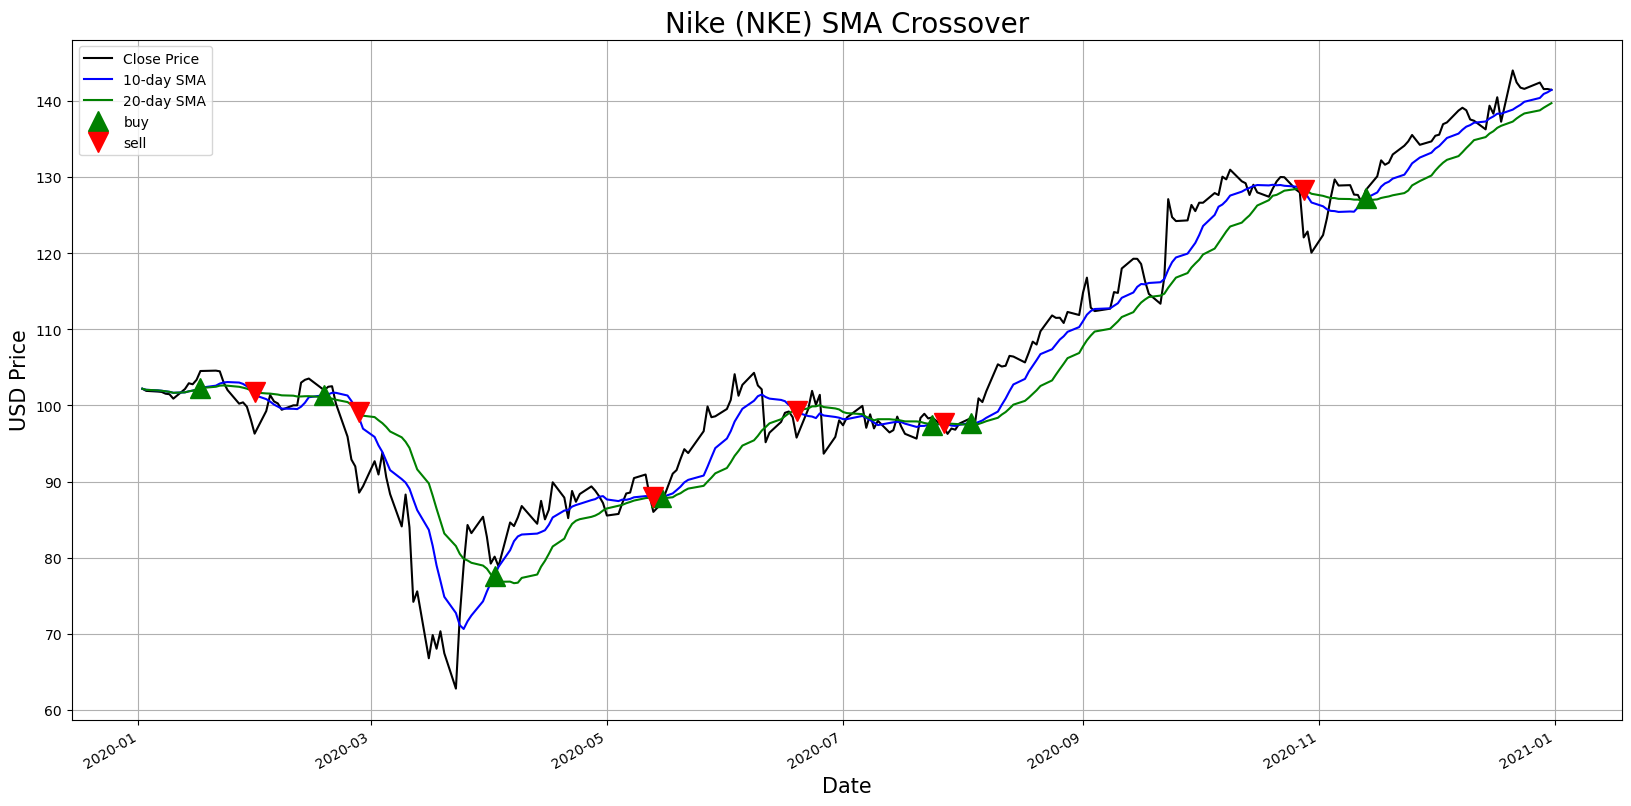

In [14]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
nke['Close'].plot(color = 'k', label= 'Close Price') 
nke['10_SMA'].plot(color = 'b',label = '10-day SMA') 
nke['20_SMA'].plot(color = 'g', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(nke[nke['Position'] == 1].index, 
         nke['10_SMA'][nke['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(nke[nke['Position'] == -1].index, 
         nke['20_SMA'][nke['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title("Nike (NKE) SMA Crossover", fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## TARGET (TGT)

In [15]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

tgt = pdr.get_data_yahoo('TGT', start = start, end = end)
tgt

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,128.899994,125.260002,128.740005,126.070000,5149800.0,119.371849
2020-01-03,125.529999,123.930000,124.660004,124.760002,5018500.0,118.131447
2020-01-06,124.650002,123.220001,123.970001,123.580002,4226900.0,117.014130
2020-01-07,124.430000,123.000000,123.000000,123.800003,3641600.0,117.222466
2020-01-08,125.250000,123.339996,124.050003,123.400002,5731600.0,116.843689
...,...,...,...,...,...,...
2020-12-24,176.509995,174.669998,175.979996,175.190002,1941200.0,169.235977
2020-12-28,177.460007,174.889999,177.110001,176.389999,2442000.0,170.395187
2020-12-29,177.770004,174.460007,177.110001,175.039993,2359700.0,169.091064


In [16]:
tgt['10_SMA'] = tgt['Close'].rolling(window = 10, min_periods = 1).mean()
tgt['20_SMA'] = tgt['Close'].rolling(window = 20, min_periods = 1).mean()
tgt['Signal'] = 0.0
tgt['Signal'] = np.where(tgt['10_SMA'] > tgt['20_SMA'], 1.0, 0.0)
tgt['Position'] = tgt['Signal'].diff()
tgt.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,128.899994,125.260002,128.740005,126.070000,5149800.0,119.371849,126.070000,126.070000,0.0,NaN
2020-01-03,125.529999,123.930000,124.660004,124.760002,5018500.0,118.131447,125.415001,125.415001,0.0,0.0
2020-01-06,124.650002,123.220001,123.970001,123.580002,4226900.0,117.014130,124.803335,124.803335,0.0,0.0
2020-01-07,124.430000,123.000000,123.000000,123.800003,3641600.0,117.222466,124.552502,124.552502,0.0,0.0
2020-01-08,125.250000,123.339996,124.050003,123.400002,5731600.0,116.843689,124.322002,124.322002,0.0,0.0


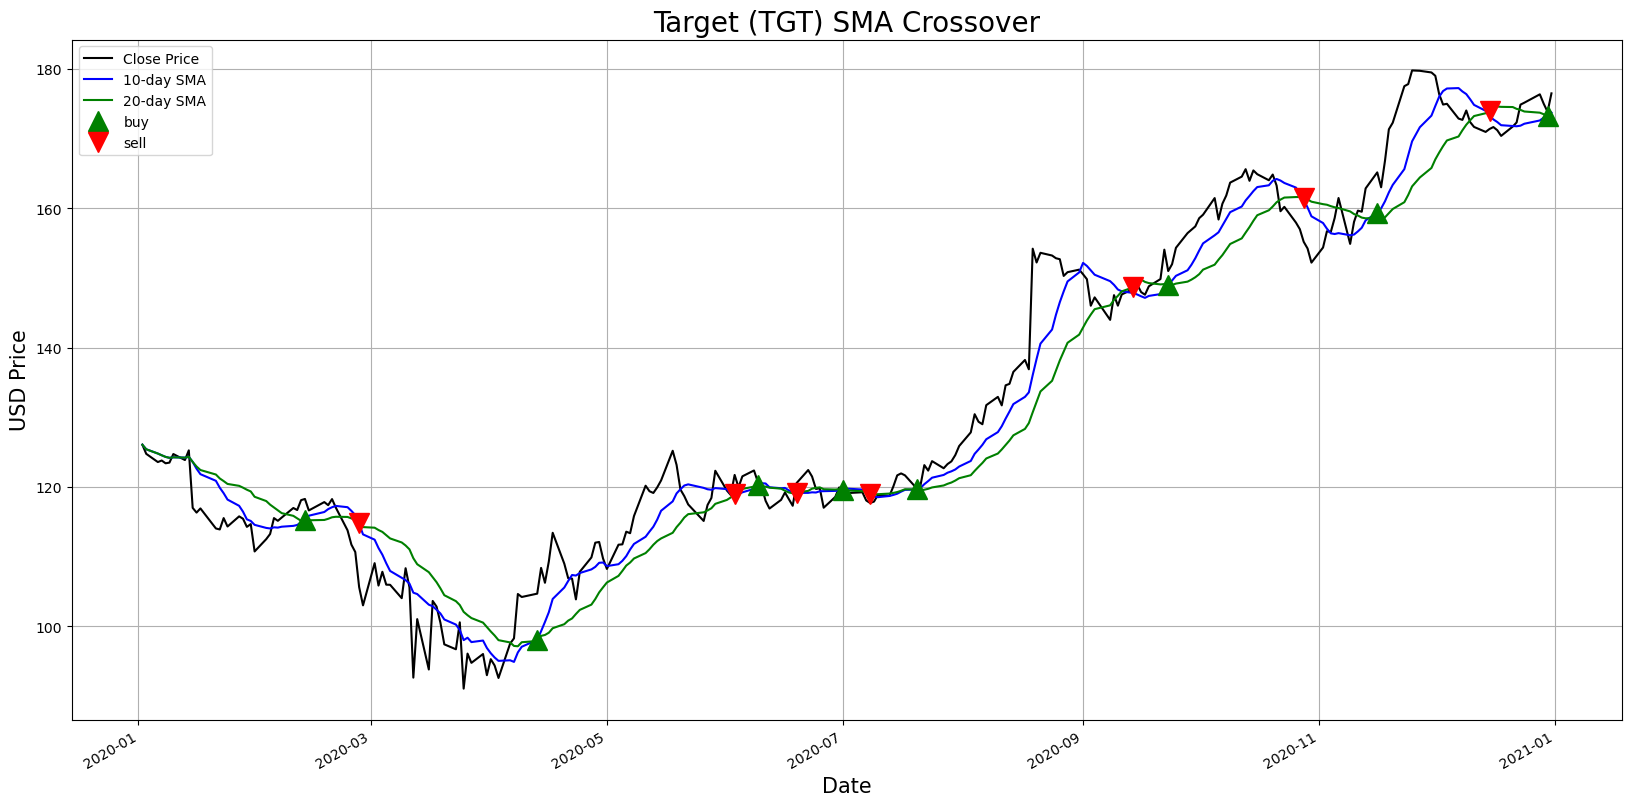

In [17]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
tgt['Close'].plot(color = 'k', label= 'Close Price') 
tgt['10_SMA'].plot(color = 'b',label = '10-day SMA') 
tgt['20_SMA'].plot(color = 'g', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(tgt[tgt['Position'] == 1].index, 
         tgt['10_SMA'][tgt['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(tgt[tgt['Position'] == -1].index, 
         tgt['20_SMA'][tgt['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title("Target (TGT) SMA Crossover", fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## MICROSOFT (MSFT)

In [18]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

msft = pdr.get_data_yahoo('MSFT', start = start, end = end)
msft

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,156.151962
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,154.207565
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,154.606186
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,153.196503
2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,155.636688
...,...,...,...,...,...,...
2020-12-24,223.610001,221.199997,221.419998,222.750000,10550600.0,218.847733
2020-12-28,226.029999,223.020004,224.449997,224.960007,17933500.0,221.018997
2020-12-29,227.179993,223.580002,226.309998,224.149994,17403200.0,220.223190


In [19]:
msft['10_SMA'] = msft['Close'].rolling(window = 10, min_periods = 1).mean()
msft['20_SMA'] = msft['Close'].rolling(window = 20, min_periods = 1).mean()
msft['Signal'] = 0.0
msft['Signal'] = np.where(msft['10_SMA'] > msft['20_SMA'], 1.0, 0.0)
msft['Position'] = msft['Signal'].diff()
msft.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,156.151962,160.619995,160.619995,0.0,NaN
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,154.207565,159.619995,159.619995,0.0,0.0
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,154.606186,159.423330,159.423330,0.0,0.0
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,153.196503,158.962498,158.962498,0.0,0.0
2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,155.636688,159.187997,159.187997,0.0,0.0


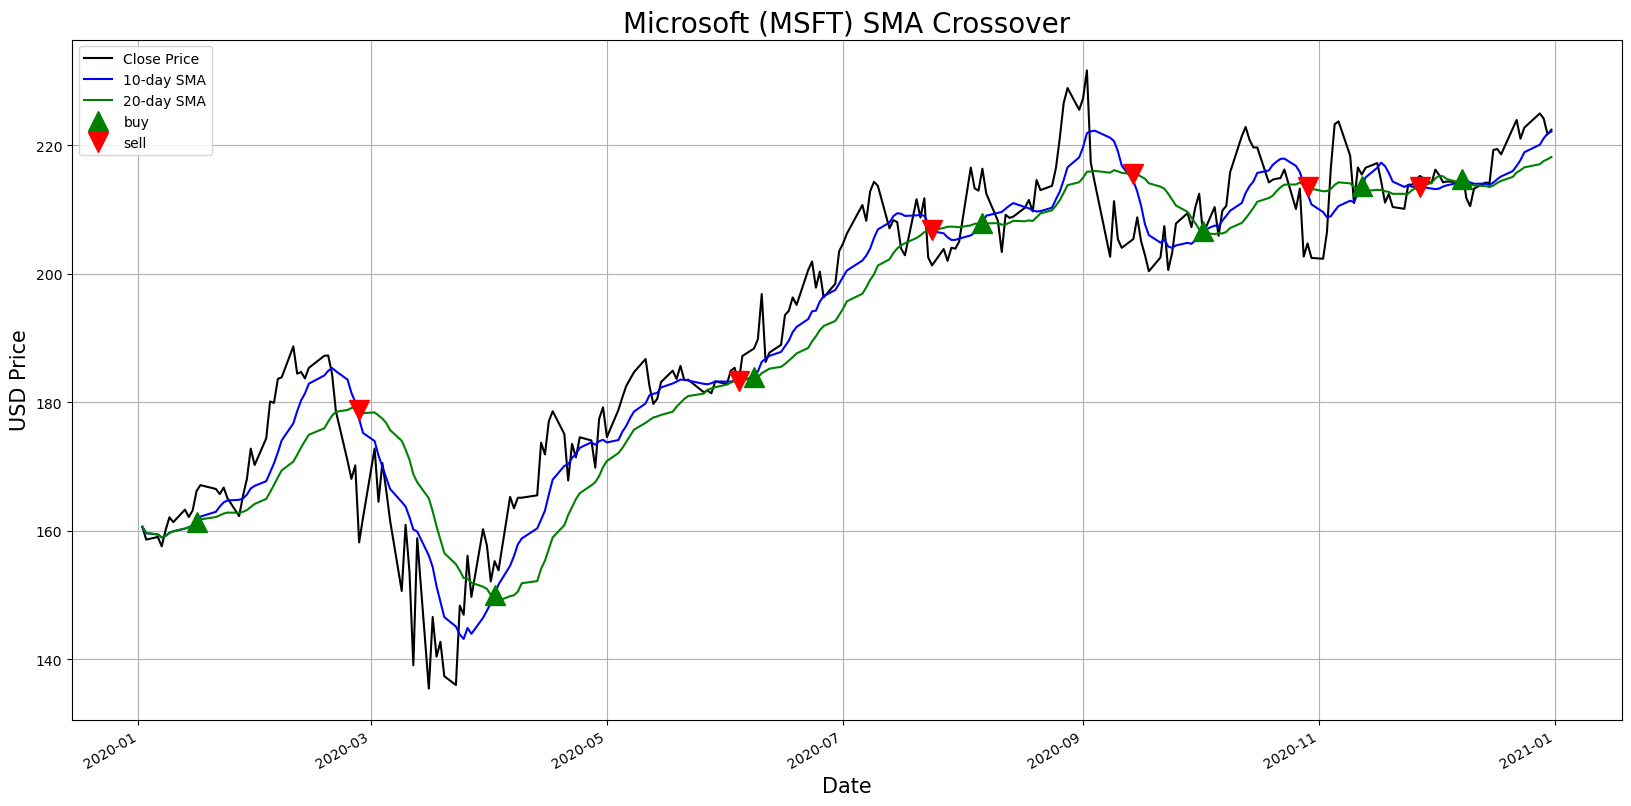

In [20]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
msft['Close'].plot(color = 'k', label= 'Close Price') 
msft['10_SMA'].plot(color = 'b',label = '10-day SMA') 
msft['20_SMA'].plot(color = 'g', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(msft[msft['Position'] == 1].index, 
         msft['10_SMA'][msft['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(msft[msft['Position'] == -1].index, 
         msft['20_SMA'][msft['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title("Microsoft (MSFT) SMA Crossover", fontsize = 20)
plt.legend()
plt.grid()
plt.show()

The remaining 5 stocks are ones in the food industry. For these stocks, the same methods are demonstrated. After testing different SMAs, I decided to continue using 10-day and 20-day moving averages. This strategy shows the most opportunities to buy or sell stocks.

## MC'DONALDS (MCD)

In [21]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

mcd = pdr.get_data_yahoo('MCD', start = start, end = end)
mcd

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,200.800003,197.809998,198.000000,200.789993,3554200.0,187.322067
2020-01-03,200.550003,198.850006,199.389999,200.080002,2767600.0,186.659698
2020-01-06,202.770004,199.350006,199.600006,202.330002,4660400.0,188.758774
2020-01-07,202.679993,200.509995,201.869995,202.630005,4047400.0,189.038666
2020-01-08,206.690002,202.199997,202.619995,205.910004,5284200.0,192.098648
...,...,...,...,...,...,...
2020-12-24,212.740005,211.139999,212.119995,211.389999,1047700.0,202.131317
2020-12-28,214.880005,212.190002,212.990005,214.020004,2550100.0,204.646133
2020-12-29,215.779999,212.449997,214.639999,212.710007,1665700.0,203.393509


In [22]:
mcd['10_SMA'] = mcd['Close'].rolling(window = 10, min_periods = 1).mean()
mcd['20_SMA'] = mcd['Close'].rolling(window = 20, min_periods = 1).mean()
mcd['Signal'] = 0.0
mcd['Signal'] = np.where(mcd['10_SMA'] > mcd['20_SMA'], 1.0, 0.0)
mcd['Position'] = mcd['Signal'].diff()
mcd.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,200.800003,197.809998,198.000000,200.789993,3554200.0,187.322067,200.789993,200.789993,0.0,NaN
2020-01-03,200.550003,198.850006,199.389999,200.080002,2767600.0,186.659698,200.434998,200.434998,0.0,0.0
2020-01-06,202.770004,199.350006,199.600006,202.330002,4660400.0,188.758774,201.066666,201.066666,0.0,0.0
2020-01-07,202.679993,200.509995,201.869995,202.630005,4047400.0,189.038666,201.457500,201.457500,0.0,0.0
2020-01-08,206.690002,202.199997,202.619995,205.910004,5284200.0,192.098648,202.348001,202.348001,0.0,0.0


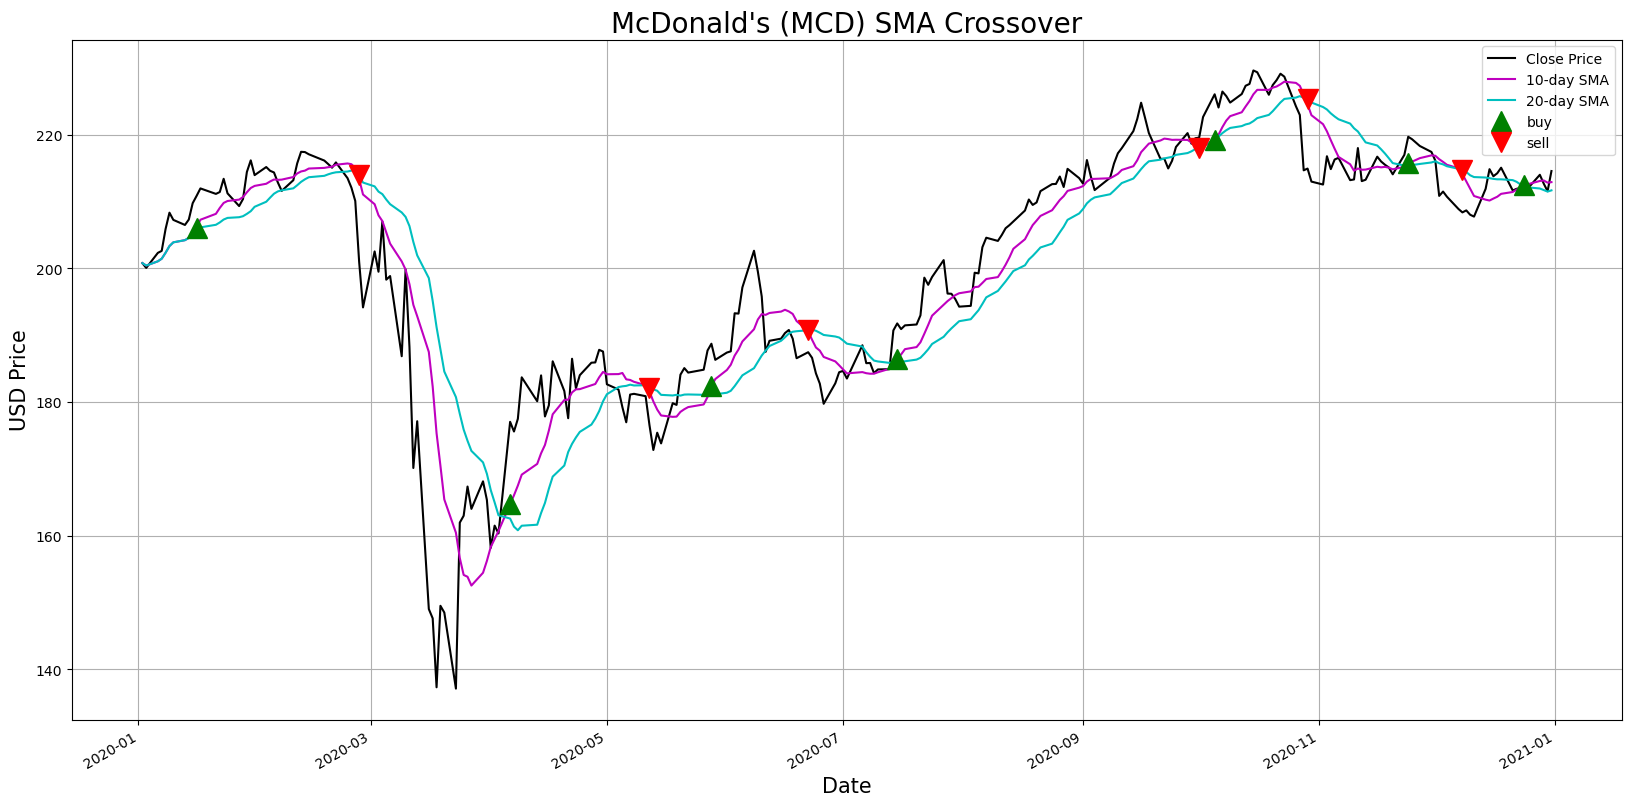

In [23]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
mcd['Close'].plot(color = 'k', label= 'Close Price') 
mcd['10_SMA'].plot(color = 'm',label = '10-day SMA') 
mcd['20_SMA'].plot(color = 'c', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(mcd[mcd['Position'] == 1].index, 
         mcd['10_SMA'][mcd['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(mcd[mcd['Position'] == -1].index, 
         mcd['20_SMA'][mcd['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title("McDonald's (MCD) SMA Crossover", fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## STARBUCKS (SBUX)

In [24]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

sbux = pdr.get_data_yahoo('SBUX', start = start, end = end)
sbux

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,89.349998,88.050003,88.120003,89.349998,6473800.0,84.121544
2020-01-03,89.099998,88.099998,88.660004,88.830002,4874100.0,83.631981
2020-01-06,88.410004,87.470001,88.110001,88.129997,5409800.0,82.972931
2020-01-07,88.029999,87.129997,87.959999,87.860001,6514700.0,82.718750
2020-01-08,89.349998,87.779999,87.940002,88.879997,7296300.0,83.679047
...,...,...,...,...,...,...
2020-12-24,102.360001,101.680000,102.300003,102.010002,1949200.0,98.021515
2020-12-28,104.379997,102.309998,102.919998,104.339996,5055200.0,100.260406
2020-12-29,105.779999,104.470001,104.889999,105.629997,4780900.0,101.499985


In [25]:
sbux['10_SMA'] = sbux['Close'].rolling(window = 10, min_periods = 1).mean()
sbux['20_SMA'] = sbux['Close'].rolling(window = 20, min_periods = 1).mean()
sbux['Signal'] = 0.0
sbux['Signal'] = np.where(sbux['10_SMA'] > sbux['20_SMA'], 1.0, 0.0)
sbux['Position'] = sbux['Signal'].diff()
sbux.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,89.349998,88.050003,88.120003,89.349998,6473800.0,84.121544,89.349998,89.349998,0.0,NaN
2020-01-03,89.099998,88.099998,88.660004,88.830002,4874100.0,83.631981,89.090000,89.090000,0.0,0.0
2020-01-06,88.410004,87.470001,88.110001,88.129997,5409800.0,82.972931,88.769999,88.769999,0.0,0.0
2020-01-07,88.029999,87.129997,87.959999,87.860001,6514700.0,82.718750,88.542500,88.542500,0.0,0.0
2020-01-08,89.349998,87.779999,87.940002,88.879997,7296300.0,83.679047,88.609999,88.609999,0.0,0.0


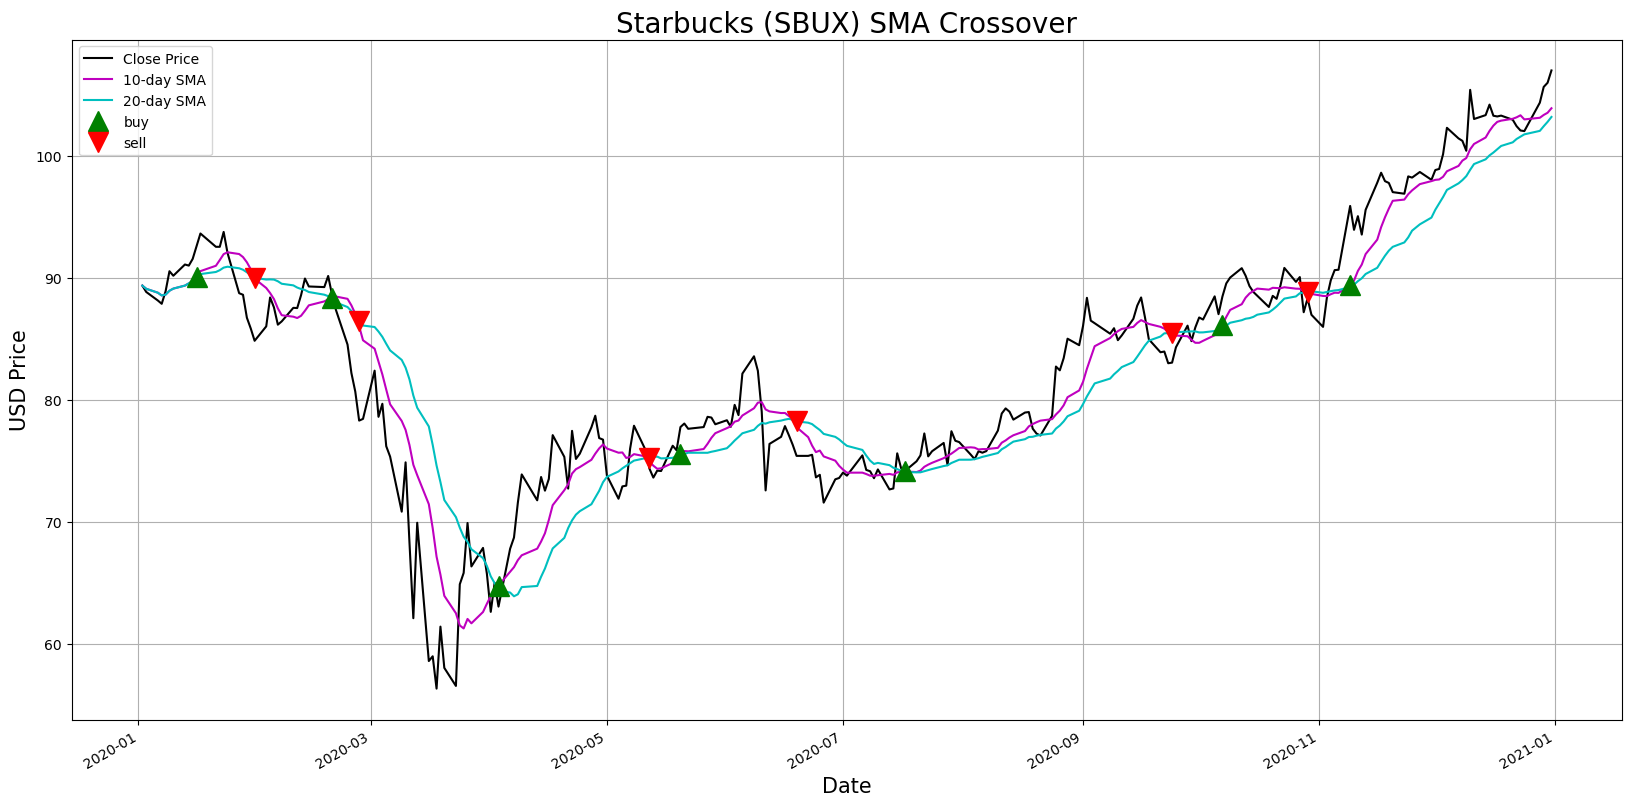

In [26]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
sbux['Close'].plot(color = 'k', label= 'Close Price') 
sbux['10_SMA'].plot(color = 'm',label = '10-day SMA') 
sbux['20_SMA'].plot(color = 'c', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(sbux[sbux['Position'] == 1].index, 
         sbux['10_SMA'][sbux['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(sbux[sbux['Position'] == -1].index, 
         sbux['20_SMA'][sbux['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title("Starbucks (SBUX) SMA Crossover", fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## COCA-COLA (KO)

In [27]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

ko = pdr.get_data_yahoo('KO', start = start, end = end)
ko

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,55.430000,54.759998,55.320000,54.990002,11867700.0,50.064274
2020-01-03,54.990002,54.090000,54.320000,54.689999,11354500.0,49.791138
2020-01-06,54.910000,54.520000,54.650002,54.669998,14698300.0,49.772934
2020-01-07,54.599998,54.150002,54.450001,54.250000,9973900.0,49.390556
2020-01-08,54.639999,54.150002,54.270000,54.349998,10676000.0,49.481598
...,...,...,...,...,...,...
2020-12-24,53.549999,53.020000,53.020000,53.439999,3265500.0,50.318050
2020-12-28,54.439999,53.730000,53.849998,54.160000,9020500.0,50.995987
2020-12-29,54.490002,54.020000,54.450001,54.130001,8320600.0,50.967743


In [28]:
ko['10_SMA'] = ko['Close'].rolling(window = 10, min_periods = 1).mean()
ko['20_SMA'] = ko['Close'].rolling(window = 20, min_periods = 1).mean()
ko['Signal'] = 0.0
ko['Signal'] = np.where(ko['10_SMA'] > ko['20_SMA'], 1.0, 0.0)
ko['Position'] = ko['Signal'].diff()
ko.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,55.430000,54.759998,55.320000,54.990002,11867700.0,50.064274,54.990002,54.990002,0.0,NaN
2020-01-03,54.990002,54.090000,54.320000,54.689999,11354500.0,49.791138,54.840000,54.840000,0.0,0.0
2020-01-06,54.910000,54.520000,54.650002,54.669998,14698300.0,49.772934,54.783333,54.783333,0.0,0.0
2020-01-07,54.599998,54.150002,54.450001,54.250000,9973900.0,49.390556,54.650000,54.650000,0.0,0.0
2020-01-08,54.639999,54.150002,54.270000,54.349998,10676000.0,49.481598,54.589999,54.589999,0.0,0.0


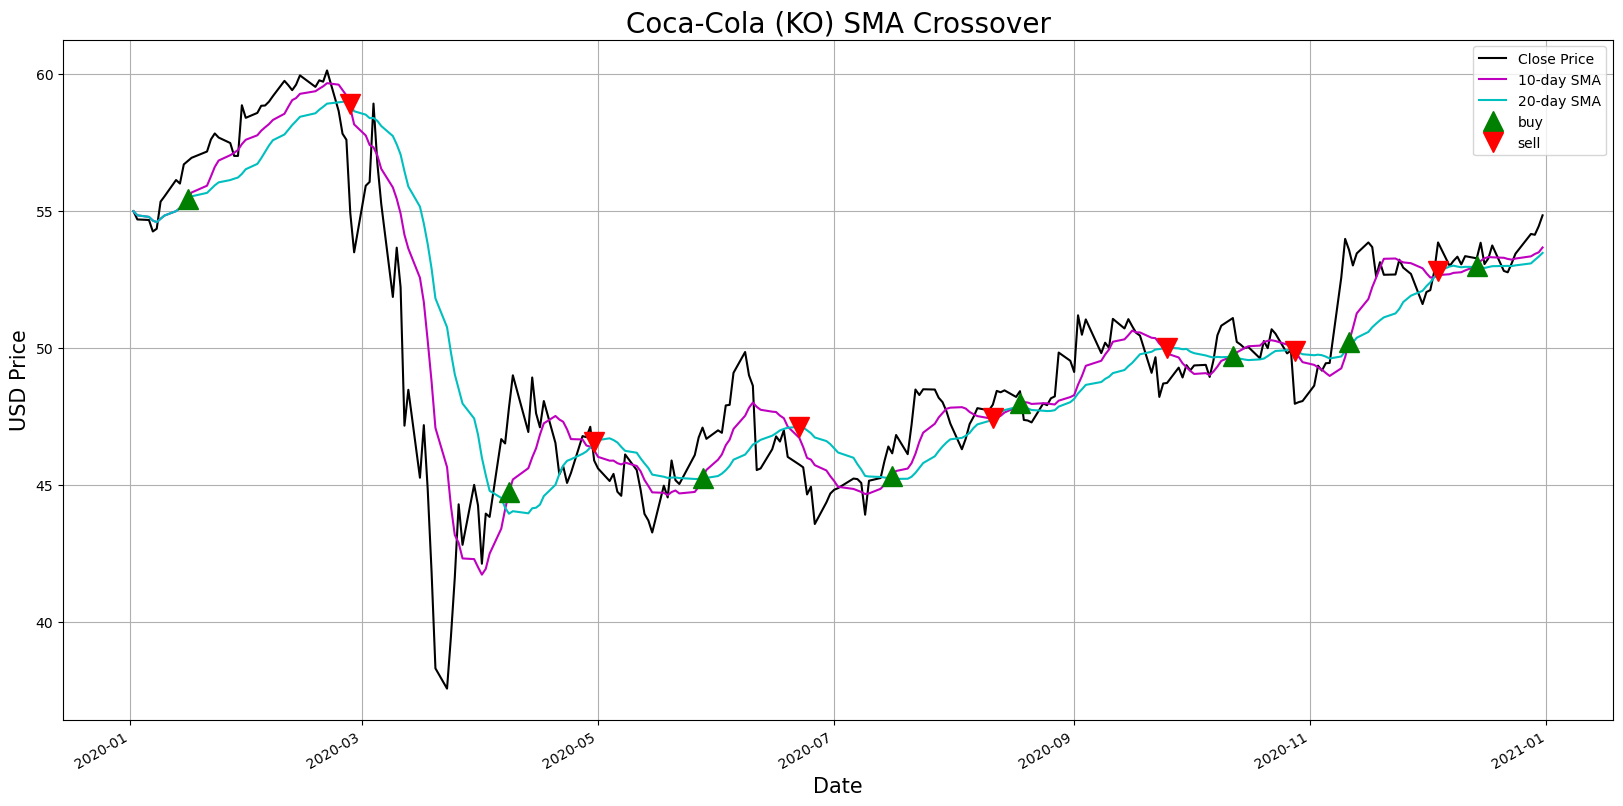

In [29]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
ko['Close'].plot(color = 'k', label= 'Close Price') 
ko['10_SMA'].plot(color = 'm',label = '10-day SMA') 
ko['20_SMA'].plot(color = 'c', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(ko[ko['Position'] == 1].index, 
         ko['10_SMA'][ko['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(ko[ko['Position'] == -1].index, 
         ko['20_SMA'][ko['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title("Coca-Cola (KO) SMA Crossover", fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## PEPSICO (PEP)

In [30]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

pep = pdr.get_data_yahoo('PEP', start = start, end = end)
pep

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,137.229996,135.139999,136.869995,135.820007,3784100.0,124.886322
2020-01-03,136.789993,135.130005,135.460007,135.630005,4000100.0,124.711647
2020-01-06,136.320007,135.199997,135.300003,136.149994,4085100.0,125.189758
2020-01-07,136.070007,133.949997,136.000000,134.009995,5718100.0,123.222023
2020-01-08,135.360001,134.070007,134.460007,134.699997,3681400.0,123.856499
...,...,...,...,...,...,...
2020-12-24,145.110001,144.139999,144.830002,145.059998,883300.0,137.269516
2020-12-28,147.600006,145.539993,145.779999,146.910004,2493500.0,139.020172
2020-12-29,148.770004,146.839996,147.679993,147.419998,3186700.0,139.502762


In [31]:
pep['10_SMA'] = pep['Close'].rolling(window = 10, min_periods = 1).mean()
pep['20_SMA'] = pep['Close'].rolling(window = 20, min_periods = 1).mean()
pep['Signal'] = 0.0
pep['Signal'] = np.where(pep['10_SMA'] > pep['20_SMA'], 1.0, 0.0)
pep['Position'] = pep['Signal'].diff()
pep.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,137.229996,135.139999,136.869995,135.820007,3784100.0,124.886322,135.820007,135.820007,0.0,NaN
2020-01-03,136.789993,135.130005,135.460007,135.630005,4000100.0,124.711647,135.725006,135.725006,0.0,0.0
2020-01-06,136.320007,135.199997,135.300003,136.149994,4085100.0,125.189758,135.866669,135.866669,0.0,0.0
2020-01-07,136.070007,133.949997,136.000000,134.009995,5718100.0,123.222023,135.402500,135.402500,0.0,0.0
2020-01-08,135.360001,134.070007,134.460007,134.699997,3681400.0,123.856499,135.262000,135.262000,0.0,0.0


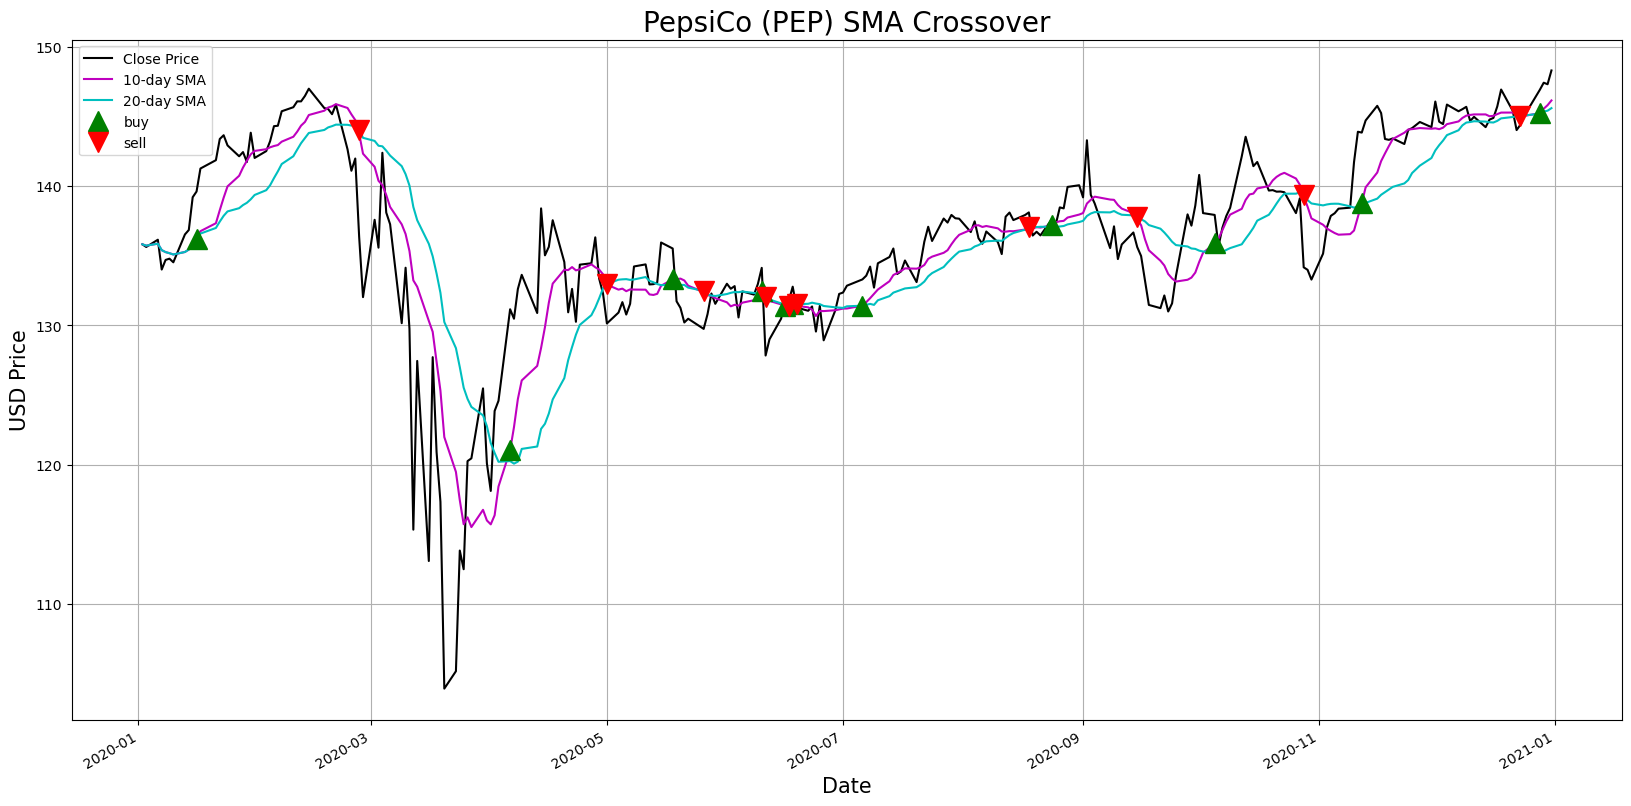

In [32]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
pep['Close'].plot(color = 'k', label= 'Close Price') 
pep['10_SMA'].plot(color = 'm',label = '10-day SMA') 
pep['20_SMA'].plot(color = 'c', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(pep[pep['Position'] == 1].index, 
         pep['10_SMA'][pep['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(pep[pep['Position'] == -1].index, 
         pep['20_SMA'][pep['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title("PepsiCo (PEP) SMA Crossover", fontsize = 20)
plt.legend()
plt.grid()
plt.show()

## GENERAL MILLS (GIS)

In [33]:
start = dt.datetime(2020, 1, 1) 
end = dt.datetime(2020, 12, 31) 

gis = pdr.get_data_yahoo('GIS', start = start, end = end)
gis

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,53.799999,52.040001,53.630001,52.130001,4422100.0,47.320442
2020-01-03,52.520000,51.820000,52.230000,51.939999,4718900.0,47.147972
2020-01-06,52.730000,51.980000,52.080002,52.590000,3884700.0,47.738007
2020-01-07,52.490002,51.939999,52.299999,52.230000,4274300.0,47.411221
2020-01-08,53.060001,52.279999,52.490002,52.980000,4143400.0,48.092026
...,...,...,...,...,...,...
2020-12-24,59.160000,58.619999,58.750000,59.130001,1127400.0,55.538830
2020-12-28,59.419998,58.919998,59.220001,59.349998,2659000.0,55.745461
2020-12-29,59.820000,58.959999,59.400002,59.150002,2328900.0,55.557613


In [34]:
gis['10_SMA'] = gis['Close'].rolling(window = 10, min_periods = 1).mean()
gis['20_SMA'] = gis['Close'].rolling(window = 20, min_periods = 1).mean()
gis['Signal'] = 0.0
gis['Signal'] = np.where(gis['10_SMA'] > gis['20_SMA'], 1.0, 0.0)
gis['Position'] = gis['Signal'].diff()
gis.head()

,High,Low,Open,Close,Volume,Adj Close,10_SMA,20_SMA,Signal,Position
Date,,,,,,,,,,
2020-01-02,53.799999,52.040001,53.630001,52.130001,4422100.0,47.320442,52.130001,52.130001,0.0,NaN
2020-01-03,52.520000,51.820000,52.230000,51.939999,4718900.0,47.147972,52.035000,52.035000,0.0,0.0
2020-01-06,52.730000,51.980000,52.080002,52.590000,3884700.0,47.738007,52.220000,52.220000,0.0,0.0
2020-01-07,52.490002,51.939999,52.299999,52.230000,4274300.0,47.411221,52.222500,52.222500,0.0,0.0
2020-01-08,53.060001,52.279999,52.490002,52.980000,4143400.0,48.092026,52.374000,52.374000,0.0,0.0


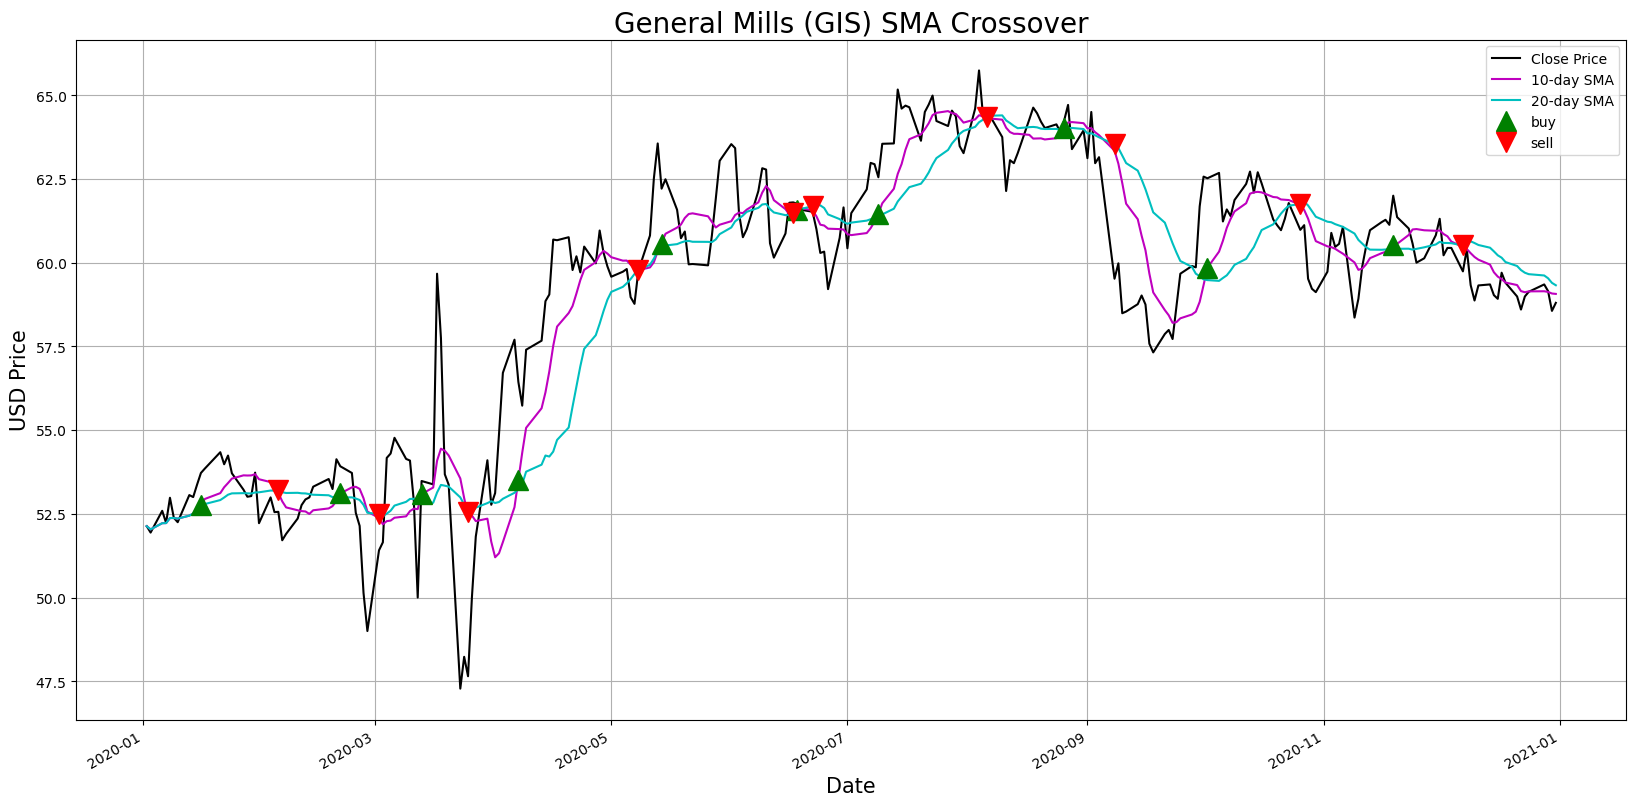

In [35]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
gis['Close'].plot(color = 'k', label= 'Close Price') 
gis['10_SMA'].plot(color = 'm',label = '10-day SMA') 
gis['20_SMA'].plot(color = 'c', label = '20-day SMA')
# plot ‘buy’ signals
plt.plot(gis[gis['Position'] == 1].index, 
         gis['10_SMA'][gis['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(gis[gis['Position'] == -1].index, 
         gis['20_SMA'][gis['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('USD Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title("General Mills (GIS) SMA Crossover", fontsize = 20)
plt.legend()
plt.grid()
plt.show()